In [279]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [280]:
df = pd.read_csv("online_shoppers_intention.csv")

# 1. Data overview

Let's first check the basics of the dataset - the rows, columns, datatypes and null values.

In [281]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [283]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [284]:
# check na values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset is pretty clean and ready for the next steps - let's see how each column is distributed.

Administrative


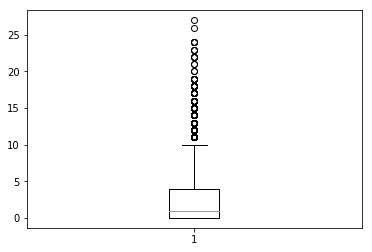

Administrative_Duration


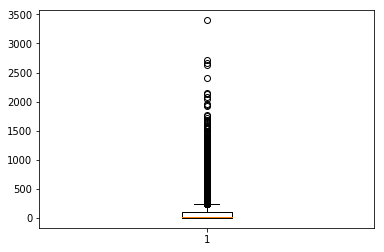

Informational


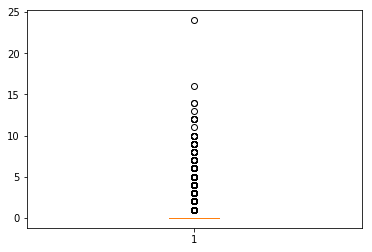

Informational_Duration


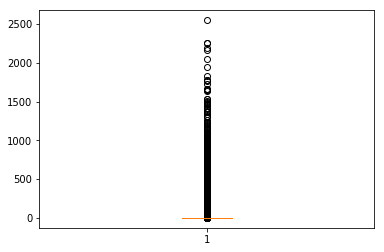

ProductRelated


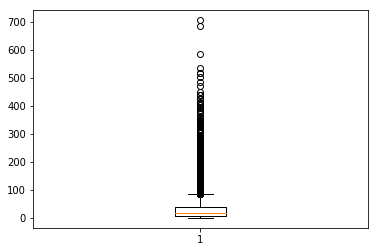

ProductRelated_Duration


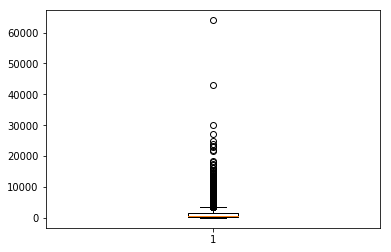

BounceRates


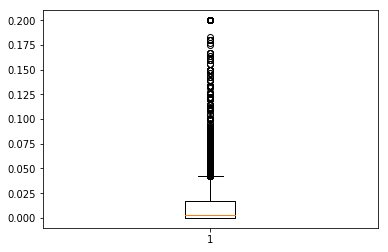

ExitRates


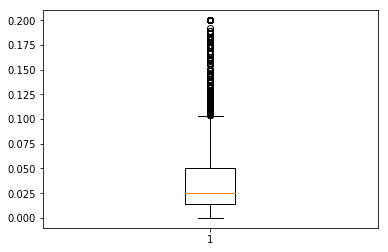

PageValues


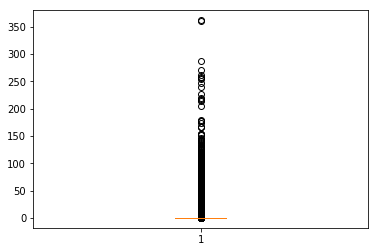

SpecialDay


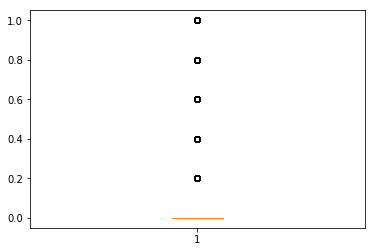

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


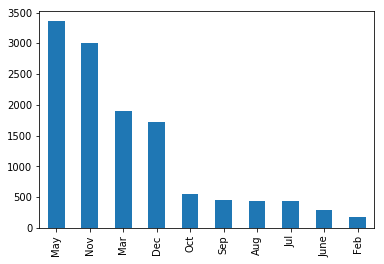

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


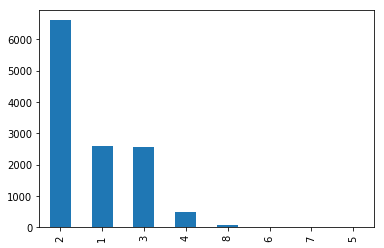

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


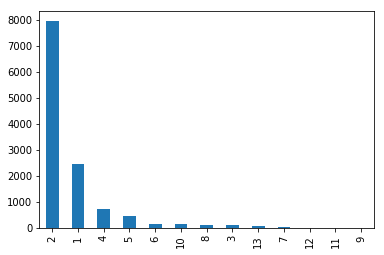

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


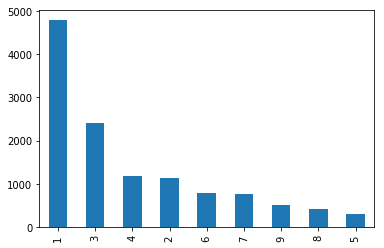

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


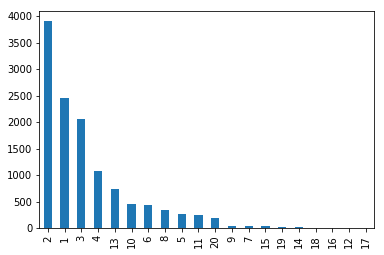

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


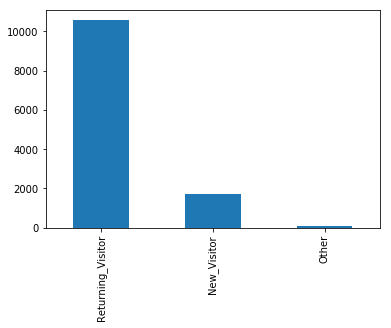

Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


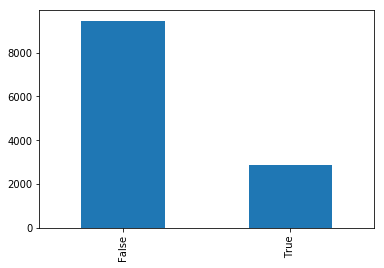

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


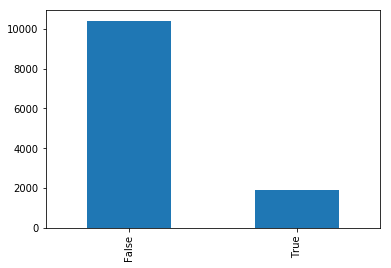

In [285]:
# type casting - bar charts for categorical columns, boxplots for numeric
cat_col = df.columns[10:16]
num_col = df.columns[0:10]
bin_col = df.columns[16:18]
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()
for i in cat_col:
    df[i] = df[i].astype("category")
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()


intersting findings: 
1. We see outliers existed in most numerical columns, especially those about page durations. It's unlikely that a person will have a session longer than hours, so we need to handle this outliers later.
2. For most categorical variables, there're some main groups, and a small number of data spreaded out in other groups. To avoid a sparse dataset after one hot encoding, we can group the small categories into one.
3. The positive class is about 15%. We may need to avoid using accuracy, over-sample the minority class or do something else to handle the class imblance issue.

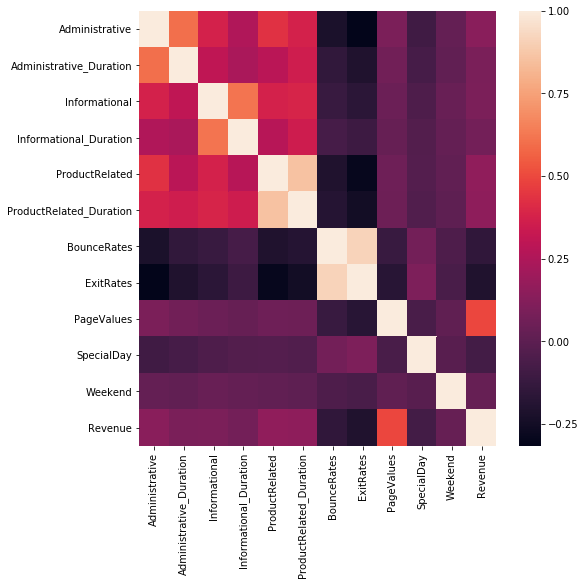

In [225]:
# check correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [226]:
df.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

We can see the correlation as a bivariate analysis. The heatmap shows us:

1. the visited page types are correlated with the respective duration. The 3 sets of variables are all correlated among them. 
2. PageValues is the most positively correlated to the lable, Revenue. Bounce rate and Exit rate are the most negatively correlated factors.

# 2. Modelling

## 2.1 outliers

In [286]:
new_df = df.copy()
# assign outliers to new values - q3+1.5*iqr
for i in ["Administrative","Administrative_Duration","ProductRelated","ProductRelated_Duration"]:
    cap = df[i].quantile(0.75)+(df[i].quantile(0.75)-df[i].quantile(0.25))
    new_df[i]=new_df[i].apply(lambda x: min(x, cap))
# for information and its duration, the iqr is rather small, so we can set the cap according to the visualization
new_df["Informational"] = new_df["Informational"].apply(lambda x: min(x, 20))
new_df["Informational_Duration"] = new_df["Informational_Duration"].apply(lambda x: min(x, 2000))


## 2.2  add new features

In [287]:
new_df["total_pages"] = new_df["Administrative"]+ new_df["ProductRelated"] + new_df["Informational"]
new_df["total_duration"] = new_df["Administrative_Duration"]+ new_df["ProductRelated_Duration"] + new_df["Informational_Duration"]

In [288]:
new_df["SpecialOrNot"] = np.where(new_df["SpecialDay"]>0,1,0)

In [289]:
new_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,SpecialOrNot
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000,0
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000,0
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,1.0,0.000000,0
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667,0
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,10.0,627.500000,0
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2,2,1,3,Returning_Visitor,False,False,19.0,154.216667,0
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,2,4,3,3,Returning_Visitor,False,False,1.0,0.000000,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,2,1,5,Returning_Visitor,True,False,1.0,0.000000,0
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2,2,2,3,Returning_Visitor,False,False,2.0,37.000000,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,2,4,1,2,Returning_Visitor,False,False,3.0,738.000000,1


## 2.3 grouping values in the categorical features
This reduces columns from 80 to about 50,and saves up computing resources and avoids possible noises in the corner cases. 

In [231]:
operating_systems_main_groups = list(new_df["OperatingSystems"].value_counts()[:5].index)
browser_main_groups = list(new_df["Browser"].value_counts()[:5].index)
region_main_groups = list(new_df["Region"].value_counts()[:5].index)
traffic_main_groups = list(new_df["TrafficType"].value_counts()[:5].index)

In [232]:
def group(x, lst):
    if x not in lst:
        return "Other"
    return x

In [233]:
new_df["OperatingSystems"] = new_df["OperatingSystems"].apply(lambda x:group(x,operating_systems_main_groups))
new_df["Browser"] = new_df["Browser"].apply(lambda x:group(x,browser_main_groups))
new_df["Region"] = new_df["Region"].apply(lambda x:group(x,region_main_groups))
new_df["TrafficType"] = new_df["TrafficType"].apply(lambda x:group(x,traffic_main_groups))


In [234]:
new_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,SpecialOrNot
0,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000,0
1,0.0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000,0
2,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4,1,Other,3,Returning_Visitor,False,False,1.0,0.000000,0
3,0.0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667,0
4,0.0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3,Other,1,4,Returning_Visitor,True,False,10.0,627.500000,0


## 2.4 One Hot Encoding
Lable encoder vs One hot encoder

In [290]:
# one hot encoding
df_ohe = pd.get_dummies(new_df)

In [291]:
df_ohe.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'total_pages', 'total_duration', 'SpecialOrNot', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'Tr

In [292]:
df_ohe.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,0,0,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1


## 2.5 Feature Selection
Remove some features that are highly colinear.


In [294]:
for i in df_ohe.columns:
    df_ohe[i] = df_ohe[i].astype("float64")
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 78 columns):
Administrative                   12330 non-null float64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null float64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null float64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Weekend                          12330 non-null float64
Revenue                          12330 non-null float64
total_pages                      12330 non-null float64
total_duration                   12330 non-null float64
SpecialOrNot                     12330 non-null float64
Month_Aug                        12330 non-null flo

In [295]:
X = df_ohe.drop('Revenue', axis = 1).values
print (type(X))
print (X.shape[1])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_ohe.drop(columns = ['Revenue']).columns

<class 'numpy.ndarray'>
77


/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [296]:
vif

,VIF Factor,features
0,inf,Administrative
1,inf,Administrative_Duration
2,inf,Informational
3,inf,Informational_Duration
4,inf,ProductRelated
5,inf,ProductRelated_Duration
6,6.805843,BounceRates
7,8.190958,ExitRates
8,1.073612,PageValues
9,6.665807,SpecialDay


In [297]:
X = df_ohe.drop(columns = ['Revenue'])
columns = X.columns.tolist()
threshold = 5
dropped = True
remain_cols = columns.copy()
while dropped:
    dropped = False
    vif = [variance_inflation_factor(X[remain_cols].values, ix) for ix in range(len(remain_cols))]
    print (vif)
    max_vif = vif.index(max(vif))
    if (max(vif) > threshold):
        print('dropping \'' + remain_cols[max_vif] + '\' at index: ' + str(max_vif))
        remain_cols.pop(max_vif)
        #remain_cols = remain_cols.drop(X.columns[max_vif])
        dropped=True
print('Remaining variables:')
print(remain_cols)


[inf, inf, inf, inf, inf, inf, 6.805842518980648, 8.19095768778729, 1.0736117088878878, 6.6658069396506345, 1.0777825538455934, inf, inf, 7.105506773295368, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'Administrative' at index: 0
[inf, 2.8805065657601094, inf, 270.96289226291714, inf, 6.805842518980648, 8.19095768778729, 1.0736117088878878, 6.6658069396506345, 1.0777825538455934, 298.42580715524963, inf, 7.105506773295368, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf

[1.7831583055098852, 1.6472735690600022, 4.123114809328721, 3.775067139381287, 6.743193149466142, 7.999394022490711, 1.072934956003364, 6.659847395060838, 1.0775613356054248, 7.103811955364158, 4.49996476095092, 1.4827618521304242, 1.9347991680732581, 1.6384130951113882, 4.8060333626486935, 6.875321915314567, 6.2642458368786516, 2.198435127724852, 1.9717983123543816, 7.826510402767591, 5.695758630222109, 1.2707123940625324, 1.0512865783817416, 1.005322814356163, 2.647822988587862, 7.190801661377927, 1.3070714670675134, 2.7979579164684005, 2.085029373045778, 1.4199906989551405, 1.1299471733527056, 1.129793134416244, 1.0063569956675917, 1.4083576456038436, 1.0214225624011286, 1.0284305462161627, 3.6395438042207644, 1.1357223266242504, 1.2182830101807196, 1.1373998487006327, 1.0496709610765922, 1.1047446068595181, 1.1032263472058448, 1.0654287567420615, 1.2102587059135217, 2.0562586900032347, 1.6401220889574644, 1.527149478379932, 1.2037577357233906, 1.187783199727208, 1.0185065679525096,

## 2.6 scaling and over sampling

In [298]:
# prepare train, test and scale the data
y = df_ohe['Revenue']
X = df_ohe[remain_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [299]:
# oversample the minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train,y_train = sm.fit_sample(X_train,y_train.ravel())

In [300]:
pd.Series(y_train).value_counts()

1.0    7824
0.0    7824
dtype: int64

In [301]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.7 model fitting and visualization

In [302]:
# visualizations code from https://www.kaggle.com/kageyama/lgbm-online-shopper-s-eda-and-classification

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


precision:  0.5235457063711911
recall:  0.7793814432989691
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      2598
         1.0       0.52      0.78      0.63       485

   micro avg       0.85      0.85      0.85      3083
   macro avg       0.74      0.82      0.77      3083
weighted avg       0.89      0.85      0.86      3083



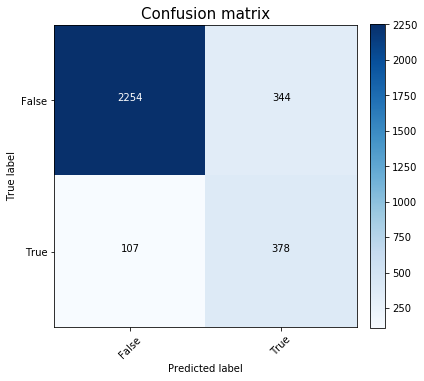

In [303]:
logreg = LogisticRegressionCV(scoring = 'f1', max_iter = 1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

precision:  0.6853658536585366
recall:  0.5793814432989691
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2598
         1.0       0.69      0.58      0.63       485

   micro avg       0.89      0.89      0.89      3083
   macro avg       0.80      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083



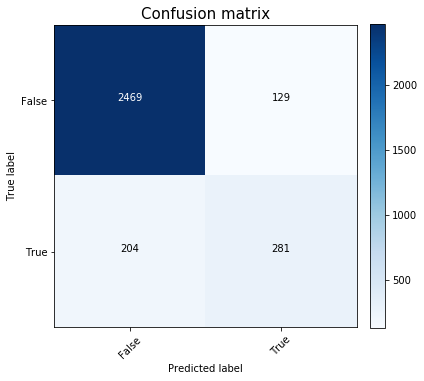

In [306]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

precision:  0.1730698865715331
recall:  0.9752577319587629
              precision    recall  f1-score   support

         0.0       0.97      0.13      0.23      2598
         1.0       0.17      0.98      0.29       485

   micro avg       0.26      0.26      0.26      3083
   macro avg       0.57      0.55      0.26      3083
weighted avg       0.84      0.26      0.24      3083

              precision    recall  f1-score   support

         0.0       0.97      0.13      0.23      2598
         1.0       0.17      0.98      0.29       485

   micro avg       0.26      0.26      0.26      3083
   macro avg       0.57      0.55      0.26      3083
weighted avg       0.84      0.26      0.24      3083



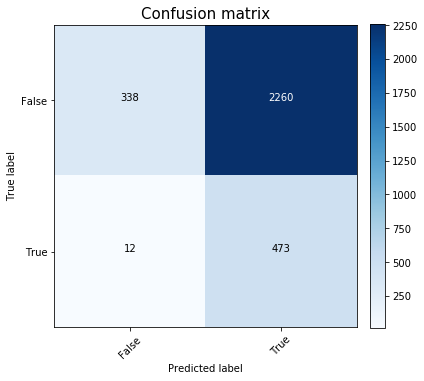

In [308]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Very high recall rate - but also high false positive rate.

Using the best performing rfc model, let's see how it predicts the conversion rate on the test population:

In [307]:
y_pred = rfc.predict(X_test_scaled)
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.13298734998378203
the actual conversion rate is 0.157314304249108


Next, we can take a closer look at the factors and how the models weighs them:

In [276]:
coef = logreg.coef_[0]
# plt.figure(figsize=(20,20))
# plt.barh(y=X.columns,width = coef)
# plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

PageValues                50.91226441526766
BounceRates               -2.940737297752408
Month_Feb                 -1.7902431056884363
Informational             1.3742000549687754
OperatingSystems_Other    -1.0421459211591193
ProductRelated_Duration   1.000985040395267
Month_May                 -0.9888863479342906
Month_Mar                 -0.9739145085533774
Month_Dec                 -0.855380420822544
OperatingSystems_8        0.6715567778043353


precision:  0.6923076923076923
recall:  0.5823529411764706


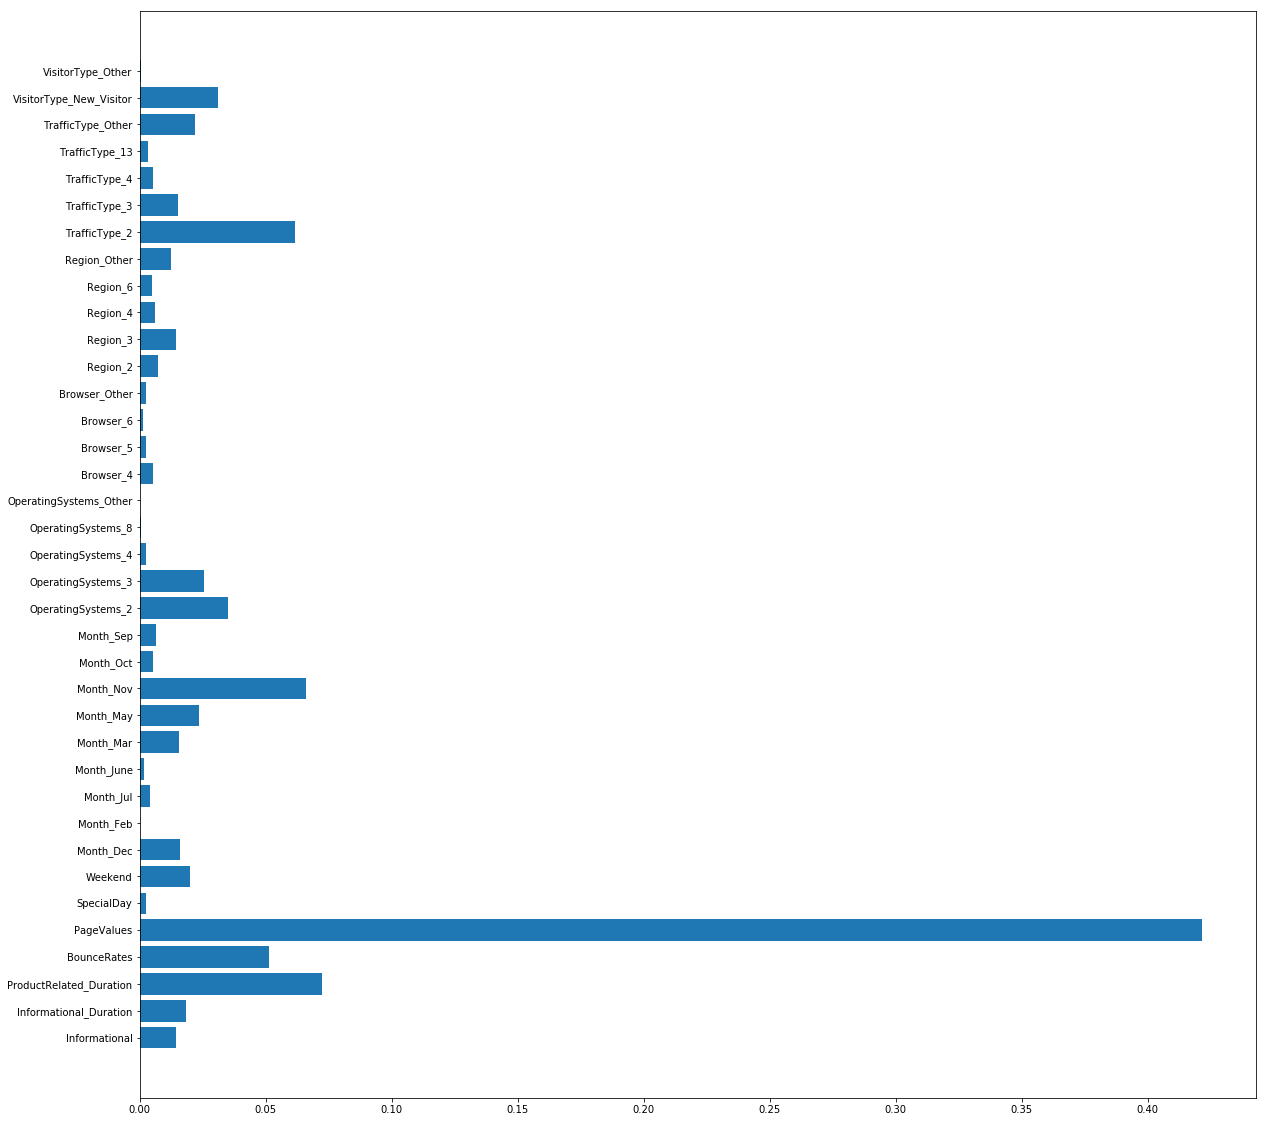

PageValues                0.4217951186461547
ProductRelated_Duration   0.07225040362085483
Month_Nov                 0.0659790486810444
TrafficType_2             0.061736278817062853
BounceRates               0.05130871710807233
OperatingSystems_2        0.035153858342861326
VisitorType_New_Visitor   0.031181342201151718
OperatingSystems_3        0.02537602299398331
Month_May                 0.02374835627009232
TrafficType_Other         0.02184345589259243


In [277]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
coef = rfc.feature_importances_
plt.figure(figsize=(20,20))
plt.barh(y=X.columns,width = coef)
plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))